 Step 1.1: Verify Folder Structure

In [1]:
import os

# Define dataset root path
dataset_path = r"C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN"

# Define processed image paths
processed_folder = os.path.join(dataset_path, "Processed_Images")
image_folder = os.path.join(processed_folder, "images")
mask_folder = os.path.join(processed_folder, "masks")

# ✅ Create necessary directories if they don’t exist
os.makedirs(processed_folder, exist_ok=True)
os.makedirs(image_folder, exist_ok=True)
os.makedirs(mask_folder, exist_ok=True)

# ✅ Verify dataset structure
folders = ["TRAIN", "VAL", "TEST"]
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    if os.path.exists(folder_path):
        print(f"✅ Found: {folder}")
    else:
        print(f"❌ Missing: {folder}")

print("✅ Dataset structure verified. Now ready for image processing!")


✅ Found: TRAIN
✅ Found: VAL
✅ Found: TEST
✅ Dataset structure verified. Now ready for image processing!


Verify Data Structure & Create Folders

In [2]:
import os

# Define dataset path
dataset_path = r"C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN"

# Define necessary folders
folders = ["TRAIN", "VAL", "TEST"]
processed_images_path = os.path.join(dataset_path, "Processed_Images")
image_folder = os.path.join(processed_images_path, "images")
mask_folder = os.path.join(processed_images_path, "masks")

# ✅ Ensure dataset structure exists
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    if not os.path.exists(folder_path):
        print(f"❌ Missing Folder: {folder_path}")

# ✅ Create processed folders if missing
os.makedirs(image_folder, exist_ok=True)
os.makedirs(mask_folder, exist_ok=True)

print("✅ Data structure verified & necessary folders created!")


✅ Data structure verified & necessary folders created!


: Resize & Save Images in Processed_Images/images

In [3]:
import os
import cv2

# Define the dataset path
dataset_path = r"C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN"
folders = ["TRAIN", "VAL", "TEST"]  # List of folders to resize

# Target image size
IMG_SIZE = (256, 256)

# Loop through each folder
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Read and resize image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Skipping {img_name}, unable to read.")
            continue
        
        img_resized = cv2.resize(img, IMG_SIZE)

        # Overwrite the original image
        cv2.imwrite(img_path, img_resized)

print("✅ All images resized to 256x256 successfully!")


Skipping annotations_train.json, unable to read.
Skipping annotations_val.json, unable to read.
Skipping annotations_test.json, unable to read.
✅ All images resized to 256x256 successfully!


In [4]:
import os
import json

# Define paths for annotations inside respective dataset folders
dataset_path = r"C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN"
subfolders = ["TRAIN", "VAL", "TEST"]
annotation_files = ["annotations_train.json", "annotations_val.json", "annotations_test.json"]

# Check if files exist and can be read
for folder, ann_file in zip(subfolders, annotation_files):
    ann_path = os.path.join(dataset_path, folder, ann_file)

    if os.path.exists(ann_path):
        try:
            with open(ann_path, "r") as f:
                data = json.load(f)
            print(f"✅ Successfully loaded {ann_file}: Contains {len(data)} annotations")
        except json.JSONDecodeError:
            print(f"❌ Error: {ann_file} is not a valid JSON file.")
    else:
        print(f"❌ File Not Found: {ann_path}")


✅ Successfully loaded annotations_train.json: Contains 500 annotations
✅ Successfully loaded annotations_val.json: Contains 201 annotations
✅ Successfully loaded annotations_test.json: Contains 100 annotations


Step 1: Check Annotations File Structure

In [5]:
import json

# Path to annotation file
annotation_file = r"C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN\annotations_all.json"

# Load annotation data
with open(annotation_file, "r") as f:
    annotations = json.load(f)

# Print the first few annotations (limited to 1000 characters for readability)
print(json.dumps(annotations, indent=4)[:1000])

{
    "y0.jpg19127": {
        "filename": "y0.jpg",
        "size": 19127,
        "regions": [
            {
                "shape_attributes": {
                    "name": "polygon",
                    "all_points_x": [
                        84,
                        101,
                        107,
                        105,
                        109,
                        114,
                        121,
                        127,
                        128,
                        129,
                        124,
                        124,
                        122,
                        111,
                        105,
                        99,
                        92,
                        82,
                        71,
                        80,
                        73,
                        67,
                        54,
                        47,
                        58,
                        61,
                        48,
    

In [40]:
# Display the top-level keys in the annotation file
print("Top-level keys in annotations JSON:", annotations.keys())

# Check the first few entries of the 'images' and 'annotations' sections (if they exist)
if "images" in annotations:
    print("\nFirst image entry:")
    print(json.dumps(annotations["images"][:2], indent=4))  # Print first 2 image entries

if "annotations" in annotations:
    print("\nFirst annotation entry:")
    print(json.dumps(annotations["annotations"][:2], indent=4))  # Print first 2 annotation entries

if "categories" in annotations:
    print("\nCategories info:")
    print(json.dumps(annotations["categories"], indent=4))  # Print categories info


Top-level keys in annotations JSON: dict_keys(['y0.jpg19127', 'y1.jpg59363', 'y2.jpg14060', 'y3.jpg19888', 'y4.jpg15178', 'y5.jpg13964', 'y6.jpg26744', 'y7.jpg16681', 'y8.jpg25031', 'y9.jpg8501', 'y10.jpg60980', 'y11.jpg26819', 'y12.jpg21533', 'y13.jpg14731', 'y14.jpg13802', 'y15.jpg15460', 'y16.jpg40199', 'y17.jpg47733', 'y18.jpg35511', 'y19.jpg21991', 'y20.jpg20400', 'y21.jpg28846', 'y22.jpg21889', 'y23.jpg17809', 'y24.jpg14183', 'y25.jpg11375', 'y26.jpg75094', 'y27.jpg25049', 'y28.jpg21069', 'y29.jpg21739', 'y30.jpg87051', 'y31.jpg10577', 'y32.jpg18576', 'y33.jpg14698', 'y34.jpg10958', 'y35.jpg29842', 'y36.jpg46980', 'y37.jpg21510', 'y38.jpg27191', 'y39.jpg23323', 'y40.jpg21209', 'y41.jpg40186', 'y42.jpg25758', 'y43.jpg39557', 'y44.jpg42281', 'y45.jpg21609', 'y46.jpg17051', 'y47.jpg121485', 'y48.jpg27190', 'y49.jpg38203', 'y50.jpg14787', 'y51.jpg9373', 'y52.jpg15514', 'y53.jpg7046', 'y54.jpg75544', 'y55.jpg9520', 'y56.jpg94637', 'y57.jpg14800', 'y58.jpg19375', 'y59.jpg11618', 'y60.j

In [6]:
# Select one random image key
sample_key = list(annotations.keys())[0]  # Pick the first key for now
sample_annotation = annotations[sample_key]  # Get its corresponding annotation data

# Print the annotation details
print(f"Sample Key (Image File): {sample_key}\n")
print("Sample Annotation Data:")
print(json.dumps(sample_annotation, indent=4))


Sample Key (Image File): y0.jpg19127

Sample Annotation Data:
{
    "filename": "y0.jpg",
    "size": 19127,
    "regions": [
        {
            "shape_attributes": {
                "name": "polygon",
                "all_points_x": [
                    84,
                    101,
                    107,
                    105,
                    109,
                    114,
                    121,
                    127,
                    128,
                    129,
                    124,
                    124,
                    122,
                    111,
                    105,
                    99,
                    92,
                    82,
                    71,
                    80,
                    73,
                    67,
                    54,
                    47,
                    58,
                    61,
                    48,
                    45,
                    47,
                    48,
                    56,
   

In [7]:
import json

# Path to annotation file
annotation_file = os.path.join(dataset_path, "annotations_all.json")

# ✅ Load annotation data
with open(annotation_file, "r") as f:
    annotations = json.load(f)

# ✅ Print the first few annotation entries
print("🔍 Checking Annotations Structure...")
for img_name, data in list(annotations.items())[:5]:  # Show first 5 images
    print(f"\n🖼 Image: {img_name}")
    print("Regions:", data.get("regions", "No regions found!"))
    print("------")


🔍 Checking Annotations Structure...

🖼 Image: y0.jpg19127
Regions: [{'shape_attributes': {'name': 'polygon', 'all_points_x': [84, 101, 107, 105, 109, 114, 121, 127, 128, 129, 124, 124, 122, 111, 105, 99, 92, 82, 71, 80, 73, 67, 54, 47, 58, 61, 48, 45, 47, 48, 56, 59, 70, 76, 76], 'all_points_y': [29, 25, 28, 43, 57, 70, 78, 83, 101, 117, 123, 133, 146, 156, 162, 150, 143, 144, 147, 137, 134, 133, 123, 113, 113, 104, 99, 92, 78, 70, 53, 49, 42, 39, 32]}, 'region_attributes': {}}]
------

🖼 Image: y1.jpg59363
Regions: [{'shape_attributes': {'name': 'polygon', 'all_points_x': [256, 245, 165, 153, 160, 171, 161, 154, 159, 166, 173, 181, 193, 208, 230, 246, 264, 270, 258, 258, 245, 245, 252, 256, 249], 'all_points_y': [17, 3, 2, 14, 28, 30, 45, 71, 88, 96, 96, 103, 108, 106, 102, 87, 70, 58, 47, 38, 30, 22, 19, 14, 6]}, 'region_attributes': {}}, {'shape_attributes': {'name': 'polygon', 'all_points_x': [170, 199, 216, 220, 221, 209, 208, 223, 234, 234, 220, 209, 193, 181, 188, 196, 191, 180,

In [14]:
# def create_mask_from_annotation(annotation, original_size, img_size):
#     h_orig, w_orig = original_size  # Get original image size
#     h_resized, w_resized = img_size  # Resized target image size
    
#     mask = np.zeros(img_size, dtype=np.uint8)  # Empty mask
#     contour_list = []  # Store contours for boundary drawing

#     for region in annotation["regions"]:
#         shape_attr = region["shape_attributes"]
        
#         if shape_attr["name"] == "polygon":
#             all_x = np.array(shape_attr["all_points_x"])
#             all_y = np.array(shape_attr["all_points_y"])

#             # ✅ Correct scaling (maintain aspect ratio)
#             all_x = (all_x * w_resized / w_orig).astype(int)
#             all_y = (all_y * h_resized / h_orig).astype(int)

#             # ✅ Convert to contour format
#             contour = np.array(list(zip(all_x, all_y)), dtype=np.int32)
#             contour_list.append(contour)  # Save for border drawing

#             # ✅ Draw tumor mask
#             cv2.fillPoly(mask, [contour], 255)

#     return mask, contour_list


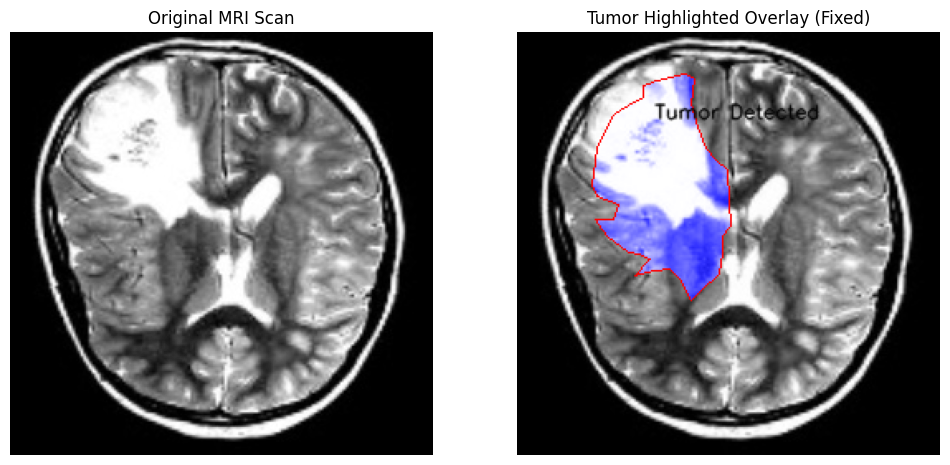

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Image dimensions
# img_size = (256, 256)
overlay_color = (0, 255, 255)  # Red for tumor annotation
alpha = 0.8  # Transparency (0.0 to 1.0)

# Function to create a mask from polygon coordinates
def create_mask_from_annotation(annotation, img_size):
    mask = np.zeros(img_size, dtype=np.uint8)
    contour_list = []  # Store contours for border

    for region in annotation["regions"]:
        shape_attr = region["shape_attributes"]
        
        if shape_attr["name"] == "polygon":
            all_x = np.array(shape_attr["all_points_x"])
            all_y = np.array(shape_attr["all_points_y"])

            # Scale the coordinates
            all_x = (all_x * img_size[1] / 256).astype(int)
            all_y = (all_y * img_size[0] / 256).astype(int)

            # Convert to contour format for OpenCV
            contour = np.array(list(zip(all_x, all_y)), dtype=np.int32)
            contour_list.append(contour)  # Save for border drawing

            # Draw tumor mask
            cv2.fillPoly(mask, [contour], 255)

    return mask, contour_list

# ✅ Load the sample image
sample_image_path = r"C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN\TRAIN\y0.jpg"
sample_image = load_img(sample_image_path, target_size=img_size, color_mode="grayscale")
sample_image = img_to_array(sample_image).squeeze()

# ✅ Normalize image for better visualization
sample_image = cv2.normalize(sample_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# ✅ Generate mask & contours
sample_mask, contours = create_mask_from_annotation(sample_annotation, img_size)

# ✅ Convert grayscale image to 3-channel for overlaying
overlay_image = cv2.cvtColor(sample_image, cv2.COLOR_GRAY2BGR)

# ✅ Create an overlay
colored_mask = np.zeros_like(overlay_image)
colored_mask[:, :, 2] = sample_mask  # Apply mask in Red channel

# ✅ Blend overlay with the original image
overlayed_image = cv2.addWeighted(overlay_image, 1, colored_mask, alpha, 0)

# ✅ Draw tumor boundary
cv2.polylines(overlayed_image, contours, isClosed=True, color=(255, 0, 0), thickness=1)

# ✅ Add label near the tumor
if len(contours) > 0:
    # Find the center of the first detected contour
    M = cv2.moments(contours[0])
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.putText(overlayed_image, "Tumor Detected", (cX - 5, cY - 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1, cv2.LINE_AA)

# ✅ Display results
plt.figure(figsize=(12, 6))

# Original MRI scan
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap="gray")
plt.title("Original MRI Scan")
plt.axis("off")

# Overlayed MRI Scan with label and border
plt.subplot(1, 2, 2)
plt.imshow(overlayed_image)
plt.title("Tumor Highlighted Overlay (Fixed)")
plt.axis("off")

plt.show()


In [9]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import save_img

# ✅ Define dataset directories
base_folder = r"C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN"
processed_folder = os.path.join(base_folder, "Processed_Images")
original_folder = os.path.join(processed_folder, "original")

# ✅ Create folders if they don't exist
os.makedirs(original_folder, exist_ok=True)

# ✅ Image size
img_size = (256, 256)

# ✅ Process all images
for folder in ["TRAIN", "TEST", "VAL"]:
    folder_path = os.path.join(base_folder, folder)

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # ✅ Check if it's a valid image
        if not img_name.lower().endswith(('.jpg', '.png', '.jpeg')):
            continue

        # ✅ Load image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Skipping {img_name}, unable to read.")
            continue

        # ✅ Resize image
        img_resized = cv2.resize(img, img_size)

        # ✅ Save original image
        save_img(os.path.join(original_folder, img_name), np.expand_dims(img_resized, axis=-1))

print(f"✅ All original images saved in: {original_folder}")


✅ All original images saved in: C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN\Processed_Images\original


In [13]:
import os
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt

# ✅ Define dataset directories
base_folder = r"C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN"
processed_folder = os.path.join(base_folder, "Processed_Images")
original_folder = os.path.join(processed_folder, "original")
overlay_folder = os.path.join(processed_folder, "overlay")

# ✅ Create overlay folder if it doesn't exist
os.makedirs(overlay_folder, exist_ok=True)

# ✅ Load the annotation JSON
annotation_file = os.path.join(base_folder, "annotations_all.json")

with open(annotation_file, "r") as f:
    annotations = json.load(f)

# ✅ Image size and overlay parameters
img_size = (256, 256)
alpha = 0.8  # Transparency for overlay
batch_size = 10  # Adjust this value as needed

# ✅ Debugging: Print first 5 keys of JSON
print("🔍 First 5 keys in annotations JSON:", list(annotations.keys())[:5])

# ✅ Debugging: Print first 5 filenames in original folder
image_list = os.listdir(original_folder)
print("📂 Original folder contains:", image_list[:5])

# ✅ Function to create a mask from polygon coordinates
def create_mask_from_annotation(annotation, img_size):
    mask = np.zeros(img_size, dtype=np.uint8)
    contour_list = []  # Store contours for border

    for region in annotation["regions"]:
        shape_attr = region["shape_attributes"]
        
        if shape_attr["name"] == "polygon":
            all_x = np.array(shape_attr["all_points_x"])
            all_y = np.array(shape_attr["all_points_y"])

            # **Fix Scaling Issues**
            all_x = (all_x * img_size[1] / 256).astype(int)
            all_y = (all_y * img_size[0] / 256).astype(int)

            # Convert to contour format
            contour = np.array(list(zip(all_x, all_y)), dtype=np.int32)
            contour_list.append(contour)

            # Draw tumor mask
            cv2.fillPoly(mask, [contour], 255)

    return mask, contour_list

# ✅ Process all images automatically
num_images = len(image_list)

for start in range(0, num_images, batch_size):
    batch_images = image_list[start:start + batch_size]  # Get batch of images

    for img_name in batch_images:
        img_path = os.path.join(original_folder, img_name)

        # ✅ Load resized original image
        img_resized = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img_resized is None:
            print(f"⚠️ Skipping {img_name}, unable to read.")
            continue

        # ✅ Extract base filename for lookup in JSON
        base_filename = os.path.splitext(img_name)[0]  # Remove file extension (.jpg, .png)
        
        # **Find the closest matching annotation key**
        matching_key = next((key for key in annotations.keys() if base_filename in key), None)
        
        if matching_key:
            print(f"✅ Found annotation for: {img_name} → {matching_key}")  # Debugging

            mask, contours = create_mask_from_annotation(annotations[matching_key], img_size)

            # ✅ Convert grayscale image to 3-channel for overlaying
            img_resized_color = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2BGR)

            # ✅ Create a colored overlay mask
            colored_mask = np.zeros_like(img_resized_color)
            colored_mask[:, :, 2] = mask  # Apply mask in **Red** channel

            # ✅ Blend overlay with the original image
            overlayed_image = cv2.addWeighted(img_resized_color, 1, colored_mask, alpha, 0)

            # ✅ Draw tumor boundary in **Red**
            cv2.polylines(overlayed_image, contours, isClosed=True, color=(255, 0, 0), thickness=2)

            # ✅ Add label near the tumor
            if len(contours) > 0:
                M = cv2.moments(contours[0])
                if M["m00"] != 0:
                    cX = int(M["m10"] / M["m00"])
                    cY = int(M["m01"] / M["m00"])
                    cv2.putText(overlayed_image, "Tumor Detected", (cX - 5, cY - 40),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1, cv2.LINE_AA)

            # ✅ Save overlay image (Use `cv2.imwrite()`)
            overlay_path = os.path.join(overlay_folder, img_name)
            cv2.imwrite(overlay_path, overlayed_image)  # Use OpenCV function

            print(f"✅ Saved overlay: {overlay_path}")

print(f"✅ All overlay images saved in: {overlay_folder}")



🔍 First 5 keys in annotations JSON: ['y0.jpg19127', 'y1.jpg59363', 'y2.jpg14060', 'y3.jpg19888', 'y4.jpg15178']
📂 Original folder contains: ['y0.jpg', 'y1.jpg', 'y10.jpg', 'y100.jpg', 'y101.jpg']
✅ Found annotation for: y0.jpg → y0.jpg19127
✅ Saved overlay: C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN\Processed_Images\overlay\y0.jpg
✅ Found annotation for: y1.jpg → y1.jpg59363
✅ Saved overlay: C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN\Processed_Images\overlay\y1.jpg
✅ Found annotation for: y10.jpg → y10.jpg60980
✅ Saved overlay: C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN\Processed_Images\overlay\y10.jpg
✅ Found annotation for: y100.jpg → y100.jpg35724
✅ Saved overlay: C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN\Processed_Images\overlay\y100.jpg
✅ Found annotation for: y101.jpg → y101.jpg24870
✅ Saved overlay: C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN\Processed_Images\overlay\y101.jpg
✅ Fo

In [46]:
import os
import shutil
import random

# Paths
processed_path = os.path.join(dataset_path, "Processed_Images")  # Update this if needed
images_path = os.path.join(processed_path, "images")
masks_path = os.path.join(processed_path, "masks")

# Output folders
splits = ["train", "val", "test"]
for split in splits:
    os.makedirs(os.path.join(processed_path, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(processed_path, split, "masks"), exist_ok=True)

# Get all images (we assume masks have the same name)
all_images = sorted(os.listdir(images_path))
random.shuffle(all_images)  # Shuffle data

# Define split sizes
train_size = int(0.8 * len(all_images))
val_size = int(0.1 * len(all_images))
test_size = len(all_images) - train_size - val_size

# Split data
train_files = all_images[:train_size]
val_files = all_images[train_size:train_size + val_size]
test_files = all_images[train_size + val_size:]

# Function to move files
def move_files(file_list, split):
    for file in file_list:
        img_src = os.path.join(images_path, file)
        mask_src = os.path.join(masks_path, file)

        img_dest = os.path.join(processed_path, split, "original", file)
        mask_dest = os.path.join(processed_path, split, "overlay", file)

        if os.path.exists(img_src):
            shutil.move(img_src, img_dest)

        if os.path.exists(mask_src):
            shutil.move(mask_src, mask_dest)

# Move files to their respective folders
move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")

print(f"✅ Data split completed: Train={len(train_files)}, Val={len(val_files)}, Test={len(test_files)}")


✅ Data split completed: Train=400, Val=50, Test=50


In [55]:
import tensorflow as tf
import os
import numpy as np
import cv2

# Paths
dataset_path = r"C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN\Processed_Images"
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")
test_path = os.path.join(dataset_path, "test")

IMG_SIZE = (256, 256)  # Image size

def load_data(folder):
    """Load images and masks from a folder"""
    image_paths = sorted([os.path.join(folder, "images", f) for f in os.listdir(os.path.join(folder, "images"))])
    mask_paths = sorted([os.path.join(folder, "masks", f) for f in os.listdir(os.path.join(folder, "masks"))])

    images, masks = [], []
    for img_path, mask_path in zip(image_paths, mask_paths):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if img is None or mask is None:
            print(f"⚠️ Skipping {img_path}, unable to load.")
            continue

        img = cv2.resize(img, IMG_SIZE) / 255.0  # Normalize image
        mask = cv2.resize(mask, IMG_SIZE) / 255.0  # Normalize mask

        images.append(img)
        masks.append(mask)

    return np.expand_dims(np.array(images), axis=-1), np.expand_dims(np.array(masks), axis=-1)

# Load datasets
X_train, Y_train = load_data(train_path)
X_val, Y_val = load_data(val_path)
X_test, Y_test = load_data(test_path)

# Print shape to confirm
print(f"✅ Train data: {X_train.shape}, {Y_train.shape}")
print(f"✅ Val data: {X_val.shape}, {Y_val.shape}")
print(f"✅ Test data: {X_test.shape}, {Y_test.shape}")


✅ Train data: (400, 256, 256, 1), (400, 256, 256, 1)
✅ Val data: (50, 256, 256, 1), (50, 256, 256, 1)
✅ Test data: (50, 256, 256, 1), (50, 256, 256, 1)


Definin model architecture

In [52]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Input layer
inputs = layers.Input(shape=(256, 256, 1))

# Encoding path (Downsampling)
conv1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(inputs)
conv1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(conv1)
pool1 = layers.MaxPooling2D((2, 2))(conv1)

conv2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(pool1)
conv2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(conv2)
pool2 = layers.MaxPooling2D((2, 2))(conv2)

conv3 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(pool2)
conv3 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(conv3)
pool3 = layers.MaxPooling2D((2, 2))(conv3)

conv4 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(pool3)
conv4 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(conv4)

# Decoding path (Upsampling)
up1 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding="same")(conv4)
up1 = layers.concatenate([up1, conv3])
conv5 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(up1)
conv5 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(conv5)

up2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(conv5)
up2 = layers.concatenate([up2, conv2])
conv6 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(up2)
conv6 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(conv6)

up3 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(conv6)
up3 = layers.concatenate([up3, conv1])
conv7 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(up3)
conv7 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(conv7)

# Output layer
outputs = layers.Conv2D(1, (1, 1), activation="sigmoid")(conv7)

# Define model
model = Model(inputs, outputs, name="UNet")

print("✅ U-Net Model redefined successfully!")

# ✅ Now compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy", tf.keras.metrics.MeanIoU(num_classes=2)])

print("✅ Model compiled successfully!")


✅ U-Net Model redefined successfully!
✅ Model compiled successfully!


In [58]:
import numpy as np
import os
import cv2

# Define dataset paths
dataset_path = r"C:\Users\Suraj Yadav\FinalProjectTY\datasetMRI\Br35H-Mask-RCNN\Processed_Images"

# Function to load images and masks correctly
def load_data(image_folder, mask_folder):
    images = []
    masks = []

    for filename in sorted(os.listdir(image_folder)):  # Sorting ensures correct alignment
        img_path = os.path.join(image_folder, filename)
        mask_path = os.path.join(mask_folder, filename)

        # Load image and mask
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Ensure both exist
        if img is not None and mask is not None:
            img = cv2.resize(img, (256, 256))  # Resize if necessary
            mask = cv2.resize(mask, (256, 256))

            images.append(img)
            masks.append(mask)

    if len(images) == 0:
        print(f"❌ No images found in {image_folder}")
    if len(masks) == 0:
        print(f"❌ No masks found in {mask_folder}")

    # Convert to NumPy arrays and reshape for TensorFlow
    images = np.array(images).reshape(-1, 256, 256, 1) / 255.0  # Normalize
    masks = np.array(masks).reshape(-1, 256, 256, 1) / 255.0  # Normalize

    return images, masks

# Load train, val, and test data
train_images, train_masks = load_data(
    os.path.join(dataset_path, "train", "images"),
    os.path.join(dataset_path, "train", "masks")
)

val_images, val_masks = load_data(
    os.path.join(dataset_path, "val", "images"),
    os.path.join(dataset_path, "val", "masks")
)

test_images, test_masks = load_data(
    os.path.join(dataset_path, "test", "images"),
    os.path.join(dataset_path, "test", "masks")
)

# Print shapes to confirm
print(f"✅ Train data: {train_images.shape}, {train_masks.shape}")
print(f"✅ Val data: {val_images.shape}, {val_masks.shape}")
print(f"✅ Test data: {test_images.shape}, {test_masks.shape}")



✅ Train data: (400, 256, 256, 1), (400, 256, 256, 1)
✅ Val data: (50, 256, 256, 1), (50, 256, 256, 1)
✅ Test data: (50, 256, 256, 1), (50, 256, 256, 1)


In [ ]:
history = model.fit(
    train_images, train_masks,
    validation_data=(val_images, val_masks),
    epochs=20,
    batch_size=8,
    verbose=1
)
